<a href="https://colab.research.google.com/github/Erofili-K/BI-BA/blob/main/BI_Ask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1η εργασία Επιχειρησιακής Έρευνας & Ευφυΐας

Όνομα: Ερωφίλη Κώνστα

ΑΕΜ: 3618
<br>
<br>

**Άσκηση 1:**
<br>
Πρώτα, κατεβάζω τα δεδομένα (dataset) και τα φορτώνω σε σε ένα Pandas DataFrame. Στην συνέχεια χρησιμοποιώ την describe() για να δω κάποιες μετρικές και το πώς είναι κατανεμημένα τα δεδομένα μέσα στο dataset.
<br>
Η μεταβλητή "ds" περιέχει το dataset της εργασίας.

In [ ]:
import pandas as pd 
import numpy as np

#dataset
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

ds = pd.read_csv("/content/GroceriesInitial.csv", delimiter=',', header='infer')
print(f"This dataset has {ds.shape} rows and collumns")
ds.head()


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 93.9MB/s]
This dataset has (7536, 35) rows and collumns


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds.describe()


,id,basket_value,recency_days
count,7536.000000,7536.000000,7536.000000
mean,4920.079485,5.036584,37.814225
std,2845.875602,3.692088,25.113222
min,1.000000,1.100000,1.000000
25%,2419.500000,2.200000,12.000000
50%,4927.000000,4.100000,37.000000
75%,7375.250000,7.000000,63.000000
max,9835.000000,25.100000,76.000000


Το πρώτο πράγμα πριν αρχίσω την επεξεργασία των δεδομένων και προχωρήσω στις ασκήσεις είναι να κάνω οπτικοποίηση των δεδομένων.
<br>
Για αυτό χρησιμοποιώ τις βιβλιοθήκες matplotlib.pyplot & seaborn 
<br>
1. Μια οπτικοποίηση που μπορουμε να κάνουμε είναι ένα ιστόγραμμα που να δείχνει **το πλήθος των συναλλαγών ανά ημέρα**. Για αυτό, πρώτα μετατρέπουμε την στήλη recency_days ,που περιέχει έναν int αριθμό, σε format ημερομηνίας και ώρας.
Επειδή, δεν έχουμε την αρχική ηερομηνία η συνάρτηση pd.to_datetime() χρησιμοποιεί μια αυθαίρετηημερομηνία. Αυτό δεν παίζει ρόλο στην οπτικοποίηση των δεδομένων, γιατί η στήλη recency_days αντιπροσωπεύει το πλήθος ημερών που πέρασαν από τη μέρα της συναλλαγής. Οπότε για παράδειγμα αν σε δυο συναλλαγές το recency_day είναι 5 τότε και οι δυο αυτές συναλλαγές πραγματοποιήθηκαν την ίδια μέρα, άρα στο ιστόγραμμα θα βρίσκονται στην ίδια "ράβδο".
<br> 
Τέλος, μπορούμε να υπλογίσουμε με τον ίδιο τρόπο τον μέσο όρο των συναλλαγών κάθε μέρα.  

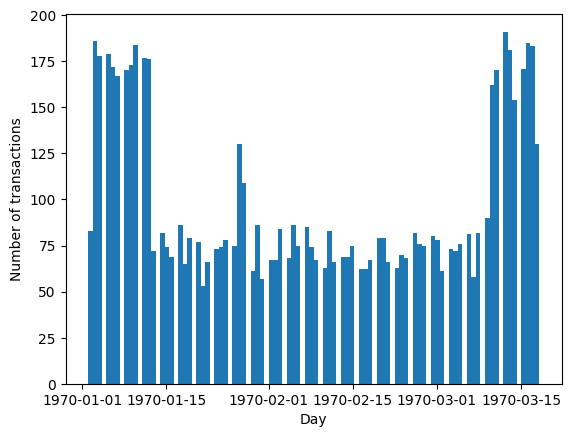

Mean number of transactions each day: 4.92502639859593 or rounded up: 5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# recency_days -> datetime format
ds['recency_days'] = pd.to_datetime(ds['recency_days'], unit='d')
# ιστογραμμα για ρον αριθμο των συναλλαγων καθε μερα
plt.hist(ds['recency_days'], bins=100)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.show()
# μο συναλλαγες ανά ημέρα
daily_transactions = ds.groupby(ds['recency_days'].dt.date)['basket_value'].mean()
print(f"Mean number of transactions each day: {daily_transactions.mean()} or rounded up: {math.ceil(daily_transactions.mean())}")

2. Μια δεύτερη αρχική οπτικοποίηση των δεδομένων που μπορεί να γίνει με το dataset είναι να δημιουργήσουμε ένα ιστογραμμα που δείχνει πόσα προϊόντα αγοράζονται συνήθως ανά συναλλαγή. Αρχικά μετράμε πόσες στήλες απο την item_1 - item_32 έχουν τιμή και δεν είναι κενές και φτιάχνουμε το ιστόγραμμα. 

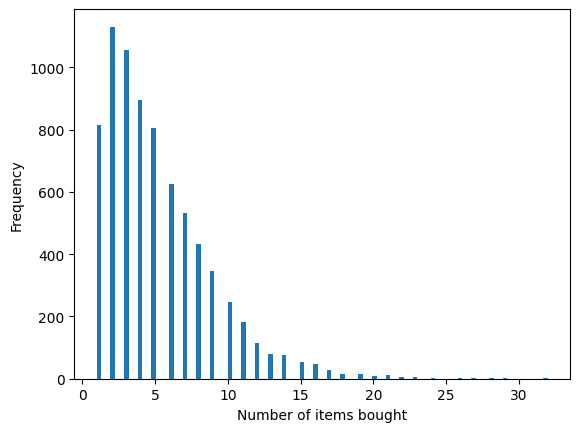

In [49]:
# πληθος προιοντων ανα συνναλλαγη
c=[]
for i, row in ds.iterrows():
    count = row.iloc[4:].count()
    #print(f"id: {row['id']} {count} items bought")
    c.append(count)

plt.hist(c, bins=100)
plt.xlabel("Number of items bought")
plt.ylabel("Frequency")
plt.show()

Στην συνέχεια πρέπει να κάνουμε μετασχηματισμό των εδομένων σε δυαδική μορφή συναλλαγών.

**Άσκηση 2**
